# World Demographics
## [Link to the Dataset](https://www.kaggle.com/datasets/kushagraarya10/cia-global-statistical-database?select=demographics_data.csv)

In [1]:
#Importing Libraries and Loading Data
import pandas as pd
import numpy as np
df = pd.read_csv("demographics_data.csv")
import matplotlib.pyplot as plt
import seaborn as sns

### Dealing With Missing Data

In [3]:
#Examining Missing Values
df.isnull().sum()

Country                     0
Total_Population           22
Population_Growth_Rate     22
Birth_Rate                 31
Death_Rate                 29
Net_Migration_Rate         30
Median_Age                 32
Sex_Ratio                  32
Infant_Mortality_Rate      32
Total_Fertility_Rate       32
Total_Literacy_Rate        91
Male_Literacy_Rate         47
Female_Literacy_Rate       47
Youth_Unemployment_Rate    53
dtype: int64

In [4]:
#Replaces missing values with the column's median
df_cleaned = df.fillna(df.median(numeric_only=True))
#creates a new csv for the cleaned data set
df_cleaned.to_csv("cleansed_demographics_data.csv")

In [5]:
#seeing the newly cleansed columns
df_cleaned.isnull().sum()

Country                     0
Total_Population           22
Population_Growth_Rate     22
Birth_Rate                  0
Death_Rate                  0
Net_Migration_Rate          0
Median_Age                  0
Sex_Ratio                   0
Infant_Mortality_Rate       0
Total_Fertility_Rate        0
Total_Literacy_Rate        91
Male_Literacy_Rate         47
Female_Literacy_Rate       47
Youth_Unemployment_Rate    53
dtype: int64

To cleanse the data first, I checked which columns had missing values. Then I replaced the columns' missing values with the median for that column. To save this new cleansed dataset I created the csv file "cleansed_demographics_data.csv". I then checked again to see if there were still some missing values. There are in the columns that have objects as their data type. Since you can only find the median for numerical values, the columns that are categorical or listed as object their missing values cannot be replaced by the median. The reason why I did not delete all the columns that had missing data was because close to all of them had missing data originally.

In [6]:
df.info()
#This is just so I can see how to better manage the data based on their type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  259 non-null    object 
 1   Total_Population         237 non-null    object 
 2   Population_Growth_Rate   237 non-null    object 
 3   Birth_Rate               228 non-null    float64
 4   Death_Rate               230 non-null    float64
 5   Net_Migration_Rate       229 non-null    float64
 6   Median_Age               227 non-null    float64
 7   Sex_Ratio                227 non-null    float64
 8   Infant_Mortality_Rate    227 non-null    float64
 9   Total_Fertility_Rate     227 non-null    float64
 10  Total_Literacy_Rate      168 non-null    object 
 11  Male_Literacy_Rate       212 non-null    object 
 12  Female_Literacy_Rate     212 non-null    object 
 13  Youth_Unemployment_Rate  206 non-null    object 
dtypes: float64(7), object(7)
m

### Histogram

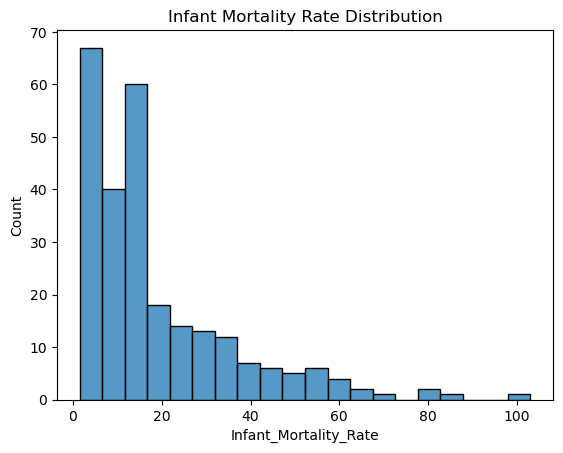

In [18]:
#Creating a Histogram
df_new = df_cleaned.copy()
df_new = df_cleaned[['Infant_Mortality_Rate']] 
sns.histplot(df_new['Infant_Mortality_Rate'], bins=20)
plt.title('Infant Mortality Rate Distribution')
plt.savefig("Histogram_Infant_Mortality_Rate.png")
plt.show()

Histograms are meant to show the range of a column. This histogram shows the Distribution for the Infant Mortality Rate. It is a good thing that most of it is below 20. The one that is 100 is very concerning. The definition of Infant Mortality Rate is the probability of an infant surviving their first year, this is calculated out of 1,000 live births. For a country to have an Infant Mortality Rate above 100 means an extreme number of babies are dying. But since most countries fall under or are at 20 for the Infant Mortality Rate; it reveals a good portion of babies live past the age of 1.

### Count Plot

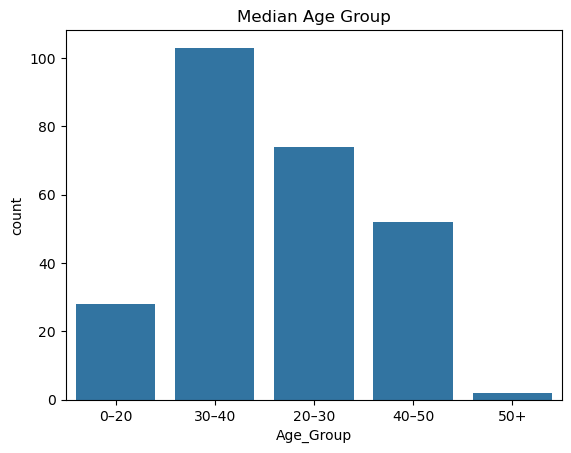

In [17]:

#To create a readable countplot I sorted the Median Ages into their Age Group 
def Age_Group(age):
    if age < 20:
        return "0–20"
    elif age < 30:
        return "20–30"
    elif age < 40:
        return "30–40"
    elif age < 50:
        return "40–50"
    else:
        return "50+"

#Creating a countplot
df_cleaned["Age_Group"] = df_cleaned["Median_Age"].apply(Age_Group)
sns.countplot(df_cleaned, x="Age_Group")
plt.title("Median Age Group")
plt.savefig("Countplot_Median_Age_Group.png")
plt.show()


Earlier I attempted to make a countplot using the median age unfiltered. That led to a practically unreadable graph. To make up for this I put the Median Ages into groupings based on age range. Looking at this graph it is clear that the Median Age for most countries is in between the 30-40 range. The second highest range for Median Age is the 20-30. With the 40-50 being the third highest Median Age range. Looking at those graphs a high portion of countries having their Median Ages between 30-50 is a good sign. The number of countries having a median age range between 0-20 is concerning because it is just under thirty. Although that number may seem small it makes one question how many people are dying.

### Line Plot

['EUROPEAN UNION' 'TOKELAU']


/var/folders/qp/16gbmz0d5kg33814vqsd9wn40000gp/T/ipykernel_1249/64970988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Age_Group"] = df_filtered["Median_Age"].apply(Age_Group)


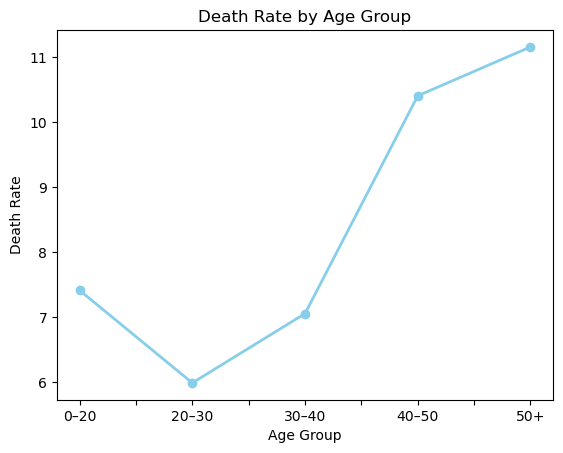

In [16]:
#This is the same sorting of Median Age I did in the previous example
def Age_Group(age):
    if age < 20:
        return "0–20"
    elif age < 30:
        return "20–30"
    elif age < 40:
        return "30–40"
    elif age < 50:
        return "40–50"
    else:
        return "50+"

#I originally created a graph and found the Death Rate was heavily skewed. I found the outliers. 
outliers = df_cleaned[df_cleaned["Death_Rate"] > 100]["Country"].unique()
print(outliers)

#I'm removing the outliers by keeping Death Rates that are under 100
df_filtered = df_cleaned[df_cleaned["Death_Rate"] <= 100]

df_filtered["Age_Group"] = df_filtered["Median_Age"].apply(Age_Group)

#Creating a line graph using groupby()
grouped = df_filtered.groupby("Age_Group")["Death_Rate"].mean()
grouped.plot(kind="line", marker='o', linewidth=2, color='skyblue')
plt.title("Death Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Death Rate")
plt.savefig("Death Rate by Age Group.png")
plt.show()

Originally when I was working on this line plot I noticed that the 50+ category went all the way up to around 400. I knew that was too high. I used the unique() function to find outliers and I removed them by only using Death Rates that were below 100. This line plot sorts the Median Age into different Age Groups. Then taking the average Death Rate from those Age Groups it graphs them. Looking at graph it is clear that the Age Group 50+ has the higher death rate. This is interesting because this Age Group is on the higher end. The Death Rate can be inferred to be higher because there may be more older people than young people. The second highest Death Rate comes from the 40-50 category so it does seem to align with this theory. It is notable that the third highest Death Rate comes from the 0-20 group. That is sad, their Death Rate is probably higher because they do not live very long. 

### Scatter Plot

['EUROPEAN UNION']


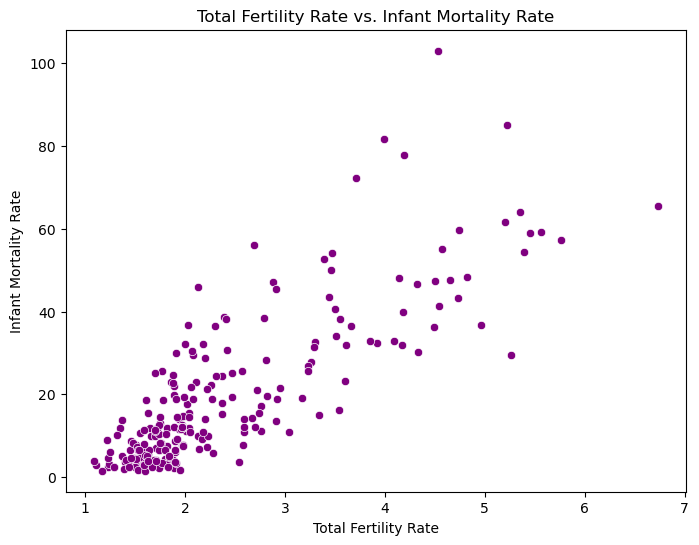

In [13]:
#The removal of outliers
outliers = df_cleaned[df_cleaned["Total_Fertility_Rate"] > 100]["Country"].unique()
print(outliers)
df_filtered = df_cleaned[df_cleaned["Total_Fertility_Rate"] <= 100]

#Creating a Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(df_filtered,x="Total_Fertility_Rate",y="Infant_Mortality_Rate",color="purple")

plt.title("Total Fertility Rate vs. Infant Mortality Rate")
plt.xlabel("Total Fertility Rate")
plt.ylabel("Infant Mortality Rate")
plt.savefig("Total_Fertility_Ratevs.Infant_Mortality_Rate.png")
plt.show()



For this dataset I had to remove an outlier because it was greatly skewing the data. It was to the point where pretty much all of the Total Fertility Rate was bunched up at one because it went all the way up to 2021. This scatterplot examines the correlation between the Total Fertility Rate and Infant Mortality Rate. There seems to be a cluster in the bottom left corner. This cluster shows that a good majority of countries fertility rate is around or under 2 and their Infant Mortality Rate is under 20. There are two interesting outliers displayed in this scatterplot. There's the dot that is almost on the 7 for Total Fertility Rate. There is also the dot that is around the 100 for Infant Mortality Rate, that is extremely high. Overall, most of the data in this scatter plot tends to stay in the bottom left corner. It reflects that many countries are having under 3 kids for Total Fertility Rate and the Infant Mortality Rate tends to stay under 40. Majority of countries staying under 40 for Infant Mortality Rate is a pretty good sign.